In [1]:
# load the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
use_columns = [
    "Date received",
    "Product",
    "Issue",
    "Consumer complaint narrative",
    "Complaint ID"  # Optional
]

df = pd.read_csv("/content/drive/MyDrive/complaints.csv", usecols=use_columns)

In [ ]:
# Check structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 5 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Issue                         object
 3   Consumer complaint narrative  object
 4   Complaint ID                  int64 
dtypes: int64(1), object(4)
memory usage: 366.6+ MB


In [ ]:
# Check missing values
df.isnull().sum()

,0
Date received,0
Product,0
Issue,6
Consumer complaint narrative,6629041
Complaint ID,0


one column have high number of null values. I remove null values

In [ ]:
df.head()

,Date received,Product,Issue,Consumer complaint narrative,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Incorrect information on your report,NaN,14195687
1,2025-06-20,Debt collection,Attempts to collect debt not owed,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Improper use of your report,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Improper use of your report,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Incorrect information on your report,NaN,14195692


In [ ]:
# Remove rows with missing 'Consumer complaint narrative'
df = df.dropna(subset=["Consumer complaint narrative"])
print(df.shape)
df.head()

(2980756, 5)


,Date received,Product,Issue,Consumer complaint narrative,Complaint ID
76,2025-03-06,Credit reporting or other personal consumer re...,Problem with fraud alerts or security freezes,XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX Apt XX...,12351447
359,2025-02-26,Credit reporting or other personal consumer re...,Incorrect information on your report,Subject : Dispute of Unauthorized Hard Inquiri...,12203565
11499,2025-06-15,Mortgage,Applying for a mortgage or refinancing an exis...,I signed a purchase agreement with Lennar Corp...,14089944
11973,2025-06-14,Credit reporting or other personal consumer re...,Improper use of your report,"After checking my report, I found numerous acc...",14080390
12237,2025-06-13,Credit card,Getting a credit card,A XXXX XXXX card was opened under my name by a...,14069121


In [ ]:
# First, convert to lowercase for consistent matching
df["Product"] = df["Product"].str.lower()

# Define keywords to search for (lowercase)
target_keywords = [
    "credit card",
    "personal loan",
    "buy now, pay later",
    "savings account",
    "money transfer"
]

# Filter rows where Product contains any of the keywords
df_filtered = df[df["Product"].apply(lambda x: any(keyword in x for keyword in target_keywords))]

In [ ]:
print(df_filtered.shape)
df_filtered.head()

(454472, 5)


,Date received,Product,Issue,Consumer complaint narrative,Complaint ID
12237,2025-06-13,credit card,Getting a credit card,A XXXX XXXX card was opened under my name by a...,14069121
12532,2025-06-13,checking or savings account,Managing an account,I made the mistake of using my wellsfargo debi...,14061897
13280,2025-06-12,credit card,"Other features, terms, or problems","Dear CFPB, I have a secured credit card with c...",14047085
13506,2025-06-12,credit card,Incorrect information on your report,I have a Citi rewards cards. The credit balanc...,14040217
13955,2025-06-09,credit card,Problem with a purchase shown on your statement,b'I am writing to dispute the following charge...,13968411


In [ ]:
# Analyze the distribution of complaints across different Products.
product_counts = df_filtered['Product'].value_counts()
print(product_counts)

Product
checking or savings account                                140319
credit card or prepaid card                                108667
money transfer, virtual currency, or money service          97188
credit card                                                 80667
payday loan, title loan, or personal loan                   17238
payday loan, title loan, personal loan, or advance loan      8896
money transfers                                              1497
Name: count, dtype: int64


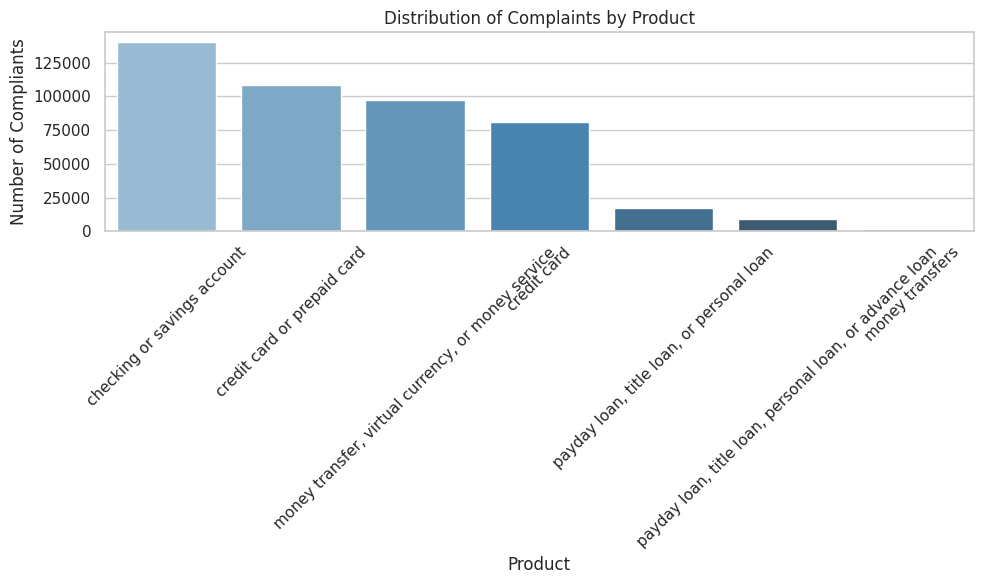

In [ ]:
sns.set(style='whitegrid')

plt.figure(figsize=(10,6))
sns.barplot(x = product_counts.index, y = product_counts.values, palette='Blues_d')
plt.title('Distribution of Complaints by Product')
plt.xlabel('Product')
plt.ylabel('Number of Compliants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Create a new column for word count
df_filtered["narrative_word_count"] = df_filtered["Consumer complaint narrative"].str.split().str.len()

In [ ]:
df_filtered.head()

,Date received,Product,Issue,Consumer complaint narrative,Complaint ID,narrative_word_count
12237,2025-06-13,credit card,Getting a credit card,A XXXX XXXX card was opened under my name by a...,14069121,91
12532,2025-06-13,checking or savings account,Managing an account,I made the mistake of using my wellsfargo debi...,14061897,109
13280,2025-06-12,credit card,"Other features, terms, or problems","Dear CFPB, I have a secured credit card with c...",14047085,156
13506,2025-06-12,credit card,Incorrect information on your report,I have a Citi rewards cards. The credit balanc...,14040217,233
13955,2025-06-09,credit card,Problem with a purchase shown on your statement,b'I am writing to dispute the following charge...,13968411,454


In [ ]:
df_filtered.describe()

,Complaint ID,narrative_word_count
count,4.544720e+05,454472.000000
mean,7.047648e+06,204.984741
std,3.341199e+06,228.164488
min,1.290323e+06,1.000000
25%,3.915842e+06,82.000000
50%,6.746077e+06,136.000000
75%,1.012373e+07,254.000000
max,1.407782e+07,6469.000000


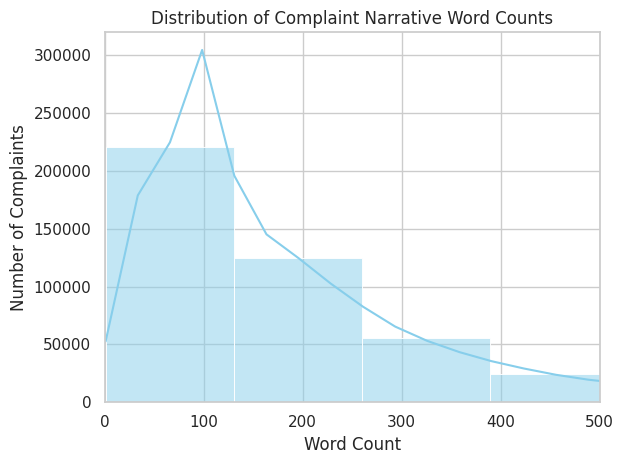

In [ ]:
# Plot the distribution of word counts in the complaint narratives
sns.histplot(df_filtered["narrative_word_count"], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Complaint Narrative Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Number of Complaints")
plt.xlim(0, 500)  # Limit to visualize common lengths, exclude extreme outliers
plt.tight_layout()
plt.show()

In [ ]:
df_filtered.head()

,Date received,Product,Issue,Consumer complaint narrative,Complaint ID,narrative_word_count
12237,2025-06-13,credit card,Getting a credit card,A XXXX XXXX card was opened under my name by a...,14069121,91
12532,2025-06-13,checking or savings account,Managing an account,I made the mistake of using my wellsfargo debi...,14061897,109
13280,2025-06-12,credit card,"Other features, terms, or problems","Dear CFPB, I have a secured credit card with c...",14047085,156
13506,2025-06-12,credit card,Incorrect information on your report,I have a Citi rewards cards. The credit balanc...,14040217,233
13955,2025-06-09,credit card,Problem with a purchase shown on your statement,b'I am writing to dispute the following charge...,13968411,454


In [ ]:
df_filtered['Consumer complaint narrative'] = df_filtered['Consumer complaint narrative'].str.lower()

In [ ]:
df_filtered['Consumer complaint narrative'].head()

,Consumer complaint narrative
12237,a xxxx xxxx card was opened under my name by a...
12532,i made the mistake of using my wellsfargo debi...
13280,"dear cfpb, i have a secured credit card with c..."
13506,i have a citi rewards cards. the credit balanc...
13955,b'i am writing to dispute the following charge...


In [ ]:
def clean_narrative(text):
    if not isinstance(text, str):
        return ""

    text = text.lower()

    # Remove "b'" prefix if present (byte-string leftover)
    text = re.sub(r"^b['\"]", "", text)

    # Remove date-like placeholders: xx/xx/xxxx or xx/xx/xx
    text = re.sub(r"\b(x{2})/(x{2})/(x{2,4})\b", "", text)

    # Remove placeholders like XXXX, XX, XXXXX etc.
    text = re.sub(r"\b(x{2,})\b", "", text)

    # Remove money placeholders like {$15000.00}
    text = re.sub(r"\{\$.*?\}", "", text)

    # Remove special characters and punctuation (but keep sentence separators optionally)
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)

    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()

    return text


In [ ]:
df_filtered["clean_narrative"] = df_filtered["Consumer complaint narrative"].apply(clean_narrative)

In [ ]:
for i in range(5):
    print("Original:", df_filtered["Consumer complaint narrative"].iloc[i])
    print("Cleaned :", df_filtered["clean_narrative"].iloc[i])
    print("---")

Original: a xxxx xxxx card was opened under my name by a fraudster. i received a notice from xxxx  that an account was just opened under my name. i reached out to xxxx xxxx to state that this activity was unauthorized and not me. xxxx xxxx confirmed this was fraudulent and immediately closed the card. however, they have failed to remove this from the three credit agencies and this fraud is now impacting my credit score based on a hard credit pull done by xxxx xxxx that was done by a fraudster.
Cleaned : a card was opened under my name by a fraudster i received a notice from that an account was just opened under my name i reached out to to state that this activity was unauthorized and not me confirmed this was fraudulent and immediately closed the card however they have failed to remove this from the three credit agencies and this fraud is now impacting my credit score based on a hard credit pull done by that was done by a fraudster
---
Original: i made the mistake of using my wellsfarg

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    words = text.split()
    return " ".join(word for word in words if word not in stop_words)

# Apply
df["clean_narrative"] = df["clean_narrative"].apply(remove_stopwords)

In [ ]:
df_filtered.reset_index(inplace=True)

In [ ]:
df_filtered.head()

,index,Date received,Product,Issue,Consumer complaint narrative,Complaint ID,narrative_word_count,clean_narrative
0,12237,2025-06-13,credit card,Getting a credit card,a xxxx xxxx card was opened under my name by a...,14069121,91,a card was opened under my name by a fraudster...
1,12532,2025-06-13,checking or savings account,Managing an account,i made the mistake of using my wellsfargo debi...,14061897,109,i made the mistake of using my wellsfargo debi...
2,13280,2025-06-12,credit card,"Other features, terms, or problems","dear cfpb, i have a secured credit card with c...",14047085,156,dear cfpb i have a secured credit card with ci...
3,13506,2025-06-12,credit card,Incorrect information on your report,i have a citi rewards cards. the credit balanc...,14040217,233,i have a citi rewards cards the credit balance...
4,13955,2025-06-09,credit card,Problem with a purchase shown on your statement,b'i am writing to dispute the following charge...,13968411,454,i am writing to dispute the following charges ...


In [ ]:
selected_cols = ["clean_narrative", "Complaint ID", "Product", "Issue", "Date received"]

In [ ]:
# Replace with your actual DataFrame name
save_path = "/content/drive/MyDrive/filtered_complaints.csv"

df_filtered[selected_cols].to_csv(save_path, index=False)